In [118]:
!pip install face_recognition


In [119]:
!pip install opencv-python

In [123]:
!pip install numpy==1.14.5

  Using cached numpy-1.14.5-cp37-none-win_amd64.whl (13.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2


ERROR: tifffile 2020.8.13 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: scikit-image 0.17.2 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: numba 0.48.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: astropy 4.0 has requirement numpy>=1.16, but you'll have numpy 1.14.5 which is incompatible.


In [124]:
!pip install scikit-image

  Using cached numpy-1.19.1-cp37-cp37m-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5


<function matplotlib.pyplot.show(*args, **kw)>

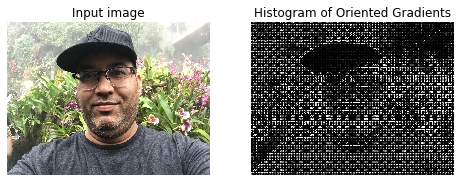

In [19]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data
from skimage import exposure
import cv2
image = cv2.imread('papa_2.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fd, hog_image = hog(image, orientations = 9, pixels_per_cell = (8,8), cells_per_block = (2,2), visualize = True, multichannel = True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,4), sharex = True, sharey = True)
ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show

In [2]:
len(fd)

434340

In [44]:
image.shape

(1280, 949, 3)

In [45]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

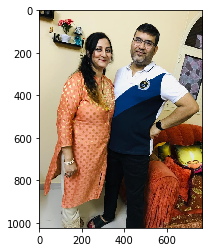

In [50]:
image = cv2.imread('mom-dad.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [51]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("Found {} face(s) in input image".format(number_of_faces))

Found 2 face(s) in input image


A face is located at pixel location Top: 247, Left: 152, Bottom: 354, Right: 259
A face is located at pixel location Top: 411, Left: 110, Bottom: 540, Right: 239


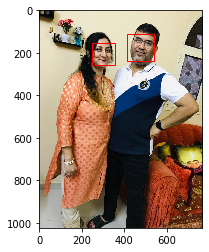

In [52]:
plt.imshow(image)
ax =  plt.gca()
for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))
    rect = Rectangle((x,y), w-x, h-y, fill = False, color = 'red')
    ax.add_patch(rect)
plt.show()

In [7]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [3]:
image = cv2.imread('Mom_1.JPG')
Mom = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.imread('Papa_1.JPG')
Papa = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
Mom_encoding = face_recognition.face_encodings(Mom)[0]
Papa_encoding = face_recognition.face_encodings(Papa)[0]
known_encodings = [
    Mom_encoding,
    Papa_encoding
]

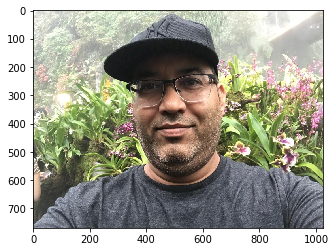

In [13]:
image = cv2.imread('papa_2.JPG')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_image_encodings = face_recognition.face_encodings(unknown_image)


In [14]:
from scipy.spatial import distance
for unknown_image_encoding in unknown_image_encodings:
    results = []
    for known_encoding in known_encodings:
        d = distance.euclidean(known_encoding, unknown_image_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold
    name = 'unknown'
    if results[0]:
        name = 'Mom'
    elif results[1]:
        name = 'Papa'
    print(f"Found {name} in the photo!")

Found Papa in the photo!
